# Data Description - House Rocket EDA

## 0.0. IMPORTS

In [18]:
import math
import pandas  as pd
import numpy   as np
import seaborn as sns

from IPython.core.display  import HTML
from matplotlib            import pyplot as plt

## 0.1. Helper Functions

In [55]:
def jupyter_settings():
    %matplotlib inline
        
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = (20,8)
    plt.rcParams['font.size'] = 25
    
    display( HTML( '<style>.container { width:90% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    
    sns.set()
    sns.set_theme(style = 'darkgrid', font_scale = 2)
    sns.set_style("darkgrid")
    sns.set(rc={'figure.figsize':(20,8)})

jupyter_settings()
    
def numerical_attributes(data):
    num_attributes = data.select_dtypes(include=['int64', 'float64'])
    
    # Central tendency = mean, median
    ct1 = pd.DataFrame(num_attributes.apply( np.mean) )
    ct2 = pd.DataFrame(num_attributes.apply( np.median) )

    # Dispersion = std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame( num_attributes.apply( np.std ) )
    d2 = pd.DataFrame( num_attributes.apply( min ) )
    d3 = pd.DataFrame( num_attributes.apply( max ) )
    d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) )
    d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) )
    d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) )

    # Concatenate
    m = pd.concat( [d2, d3, ct1, ct2, d1, d5, d6], axis=1 ).reset_index()
    m.columns = ['attributes', 'min', 'max', 'mean', 'median', 'std', 'skew', 'kurtosis']

    return m

## 0.2. Loading Data

In [56]:
df_raw = pd.read_csv('../datasets/kc_house_data.csv', low_memory=False)

## 1.0. DATA DESCRIPTION

In [57]:
df1 = df_raw.copy()

In [58]:
df1.sample(5).T

,16224,9850,20891,13607,12849
id,2123049502,8861000060,2767600673,120069003,293000180
date,20140623T000000,20141231T000000,20140701T000000,20141201T000000,20150507T000000
price,215000.000,875000.000,460000.000,495000.000,370000.000
bedrooms,3,3,3,4,2
bathrooms,2.000,1.000,2.500,3.000,1.000
sqft_living,1340,1160,1450,3620,910
sqft_lot,8505,10732,1053,403693,5525
floors,1.000,1.000,2.000,2.000,1.000
waterfront,0,0,0,0,0
view,0,0,0,2,0


## 1.1. Data Dimensions

In [24]:
print( 'Number of rows: {}'.format( df1.shape[0] ) )
print( 'Number of cols: {}'.format( df1.shape[1] ) )

Number of rows: 21613
Number of cols: 21


## 1.2. Data Types

In [25]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.3. Check NA

In [26]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4. Descriptive Statistics

### 1.7.1. Numerical Attributes

In [28]:
numerical_attributes(df1)

,attributes,min,max,mean,median,std,skew,kurtosis
0,id,1000102.000,9900000190.000,4580301520.865,3904930410.000,2876499023.428,0.243,-1.261
1,price,75000.000,7700000.000,540088.142,450000.000,367118.703,4.024,34.586
2,bedrooms,0.000,33.000,3.371,3.000,0.930,1.974,49.064
3,bathrooms,0.000,8.000,2.115,2.250,0.770,0.511,1.280
4,sqft_living,290.000,13540.000,2079.900,1910.000,918.420,1.472,5.243
5,sqft_lot,520.000,1651359.000,15106.968,7618.000,41419.553,13.060,285.078
6,floors,1.000,3.500,1.494,1.500,0.540,0.616,-0.485
7,waterfront,0.000,1.000,0.008,0.000,0.087,11.385,127.632
8,view,0.000,4.000,0.234,0.000,0.766,3.396,10.893
9,condition,1.000,5.000,3.409,3.000,0.651,1.033,0.526


C:\Users\Nelio\anaconda3\envs\HouseRocketInsightProject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

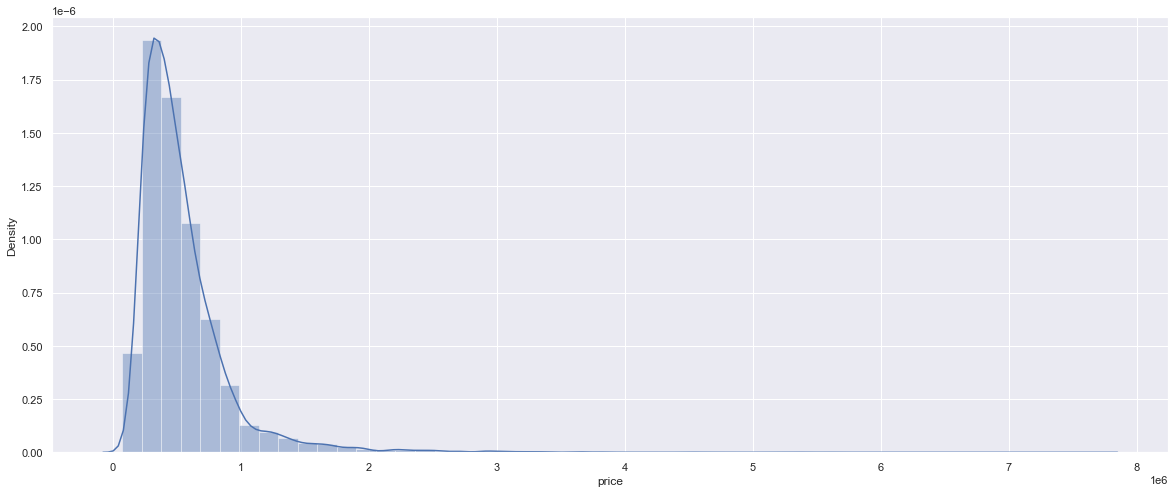

In [29]:
# Visualize data distribution by price
sns.distplot( df1['price'] )

### 1.7.2. Checking Attributes

<AxesSubplot:xlabel='bedrooms', ylabel='sqft_living'>

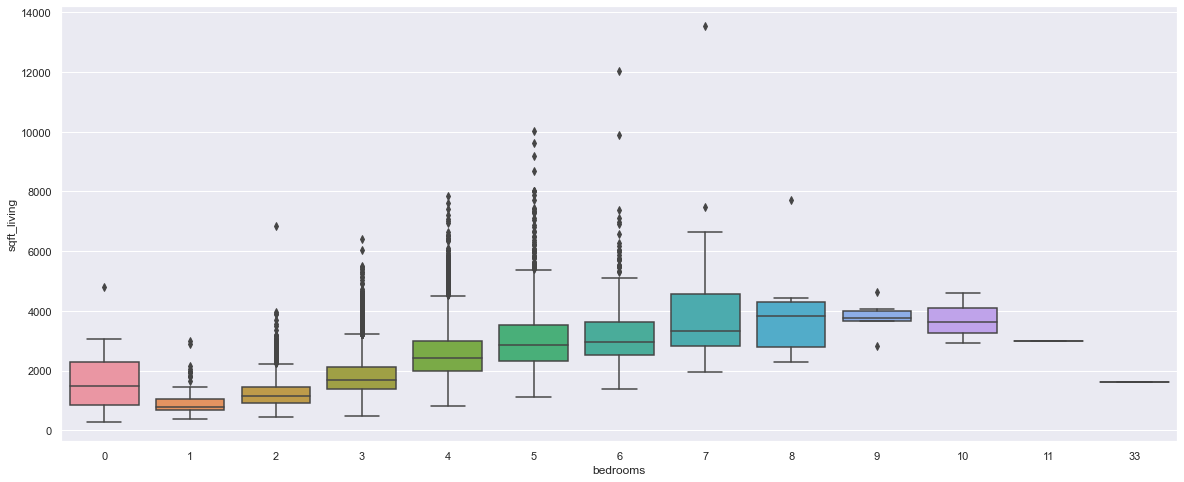

In [30]:
# Visualize number of bedrooms distribution by living area squarefeet
sns.boxplot( x='bedrooms', y='sqft_living', data=df1)

<BarContainer object of 2 artists>

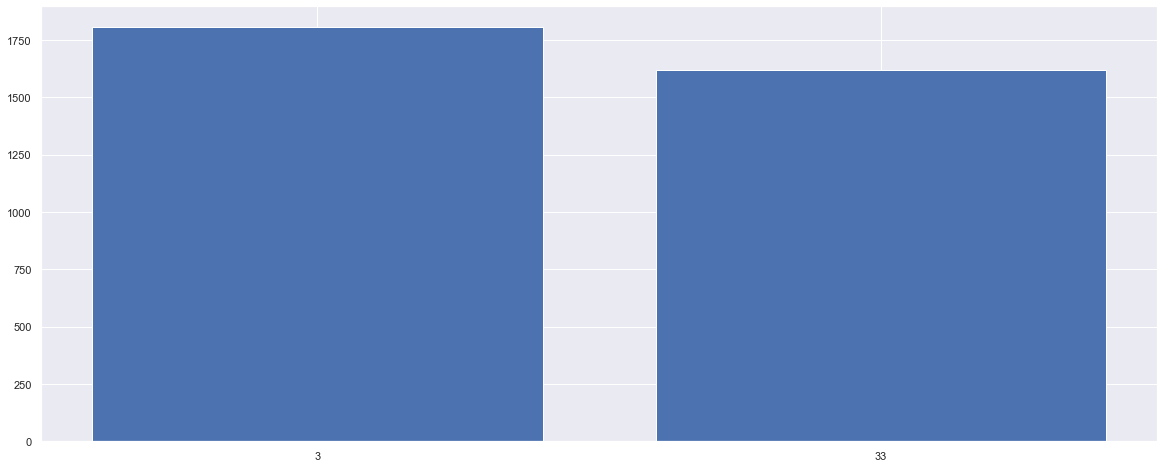

In [31]:
# Compare the mean of living area squarefeet between houses with 3 and 33 bedrooms
aux1 = df1[['bedrooms', 'sqft_living']][(df1['bedrooms'] == 3) | (df1['bedrooms'] == 33) ]
aux1 = aux1.groupby('bedrooms').mean().reset_index()
aux1['bedrooms'] = aux1['bedrooms'].astype( str )

plt.bar(aux1['bedrooms'], aux1['sqft_living'])

In [32]:
# Replace the number of bedrooms due to error input -> 1 row
df1.loc[df1['bedrooms'] == 33, 'bedrooms'] = 3

In [33]:
# Remove data with no input of number of bathrooms -> 10 rows
df1 = df1.drop( df1[df1.bathrooms == 0].index )

In [34]:
numerical_attributes(df1)

,attributes,min,max,mean,median,std,skew,kurtosis
0,id,1000102.000,9900000190.000,4580234406.671,3904930240.000,2876642163.833,0.243,-1.261
1,price,78000.000,7700000.000,540130.695,450000.000,367100.437,4.026,34.607
2,bedrooms,0.000,11.000,3.371,3.000,0.906,0.537,1.818
3,bathrooms,0.500,8.000,2.116,2.250,0.769,0.519,1.279
4,sqft_living,370.000,13540.000,2080.105,1910.000,918.124,1.473,5.251
5,sqft_lot,520.000,1651359.000,15106.422,7617.000,41428.170,13.058,284.972
6,floors,1.000,3.500,1.494,1.500,0.540,0.615,-0.491
7,waterfront,0.000,1.000,0.008,0.000,0.087,11.382,127.571
8,view,0.000,4.000,0.234,0.000,0.766,3.397,10.900
9,condition,1.000,5.000,3.410,3.000,0.651,1.036,0.520


## ## Saving Dataset

In [37]:
df1.to_csv( path_or_buf= '../datasets/transformed_data.csv', index=False )